# Recupero Dati Telemetrie
File utile a recuperare i dati delle telemetrie dal servizio FAST-F1.
Viene scaricato un file .csv contenente i dati della telemetria desiderata.

In [17]:
!pip install fastf1 -q
#!python -m pip uninstall matplotlib
#!pip install matplotlib==3.1.3

You should consider upgrading via the '/Users/simone/Documents/BD-F1TelemetryLiveAnalysis/venv/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import os                               # Libreria per gestione file

import fastf1 as ff1                    # Libreria per gestione telemetrie
from fastf1 import plotting             # Libreria per gestione grafici
from fastf1 import utils                # Libreria per gestione dati

from matplotlib import pyplot as plt    # Libreria per gestione grafici
from matplotlib.pyplot import figure     # Libreria per gestione grafici

import numpy as np                      # Libreria per gestione dati
import pandas as pd                     # Libreria per gestione dati

In [3]:
# Se non esiste la cartella cache, la crea
if not os.path.exists('cache'):
   os.makedirs('cache')

# Abilita la cache fornendo il nome della cartella della cache
ff1.Cache.enable_cache('cache')

In [4]:
year, grand_prix, session = 2022, 'Italia', 'Q' # Imposta anno, gran premio e sessione

quali = ff1.get_session(year, grand_prix, session) # Carica i dati della sessione
laps = quali.load() # Carica i dati dei giri

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching tra

In [7]:
# Selezione del pilota di cui si vogliono i dati
driver_1 = 'LEC'

In [9]:
# Accesso dei giri effettuati dal pilota
laps_driver_1 = quali.laps.pick_driver(driver_1)

# Seleziona il giro più veloce
fastest_driver_1 = laps_driver_1.pick_fastest()

# Recupero dei dati della telemetria del giro più veloce
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()

In [10]:
# Recupero del mome della scuderia del pilota selezionato
team_driver_1 = fastest_driver_1['Team']

In [13]:
# Preparazione ambiente per la creazione del grafico
plot_size = [15, 15] # Dimensioni del grafico
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1}" # Titolo del grafico
plot_ratios = [3, 2, 1, 1, 2, 1] # Rapporti tra le dimensioni dei grafici

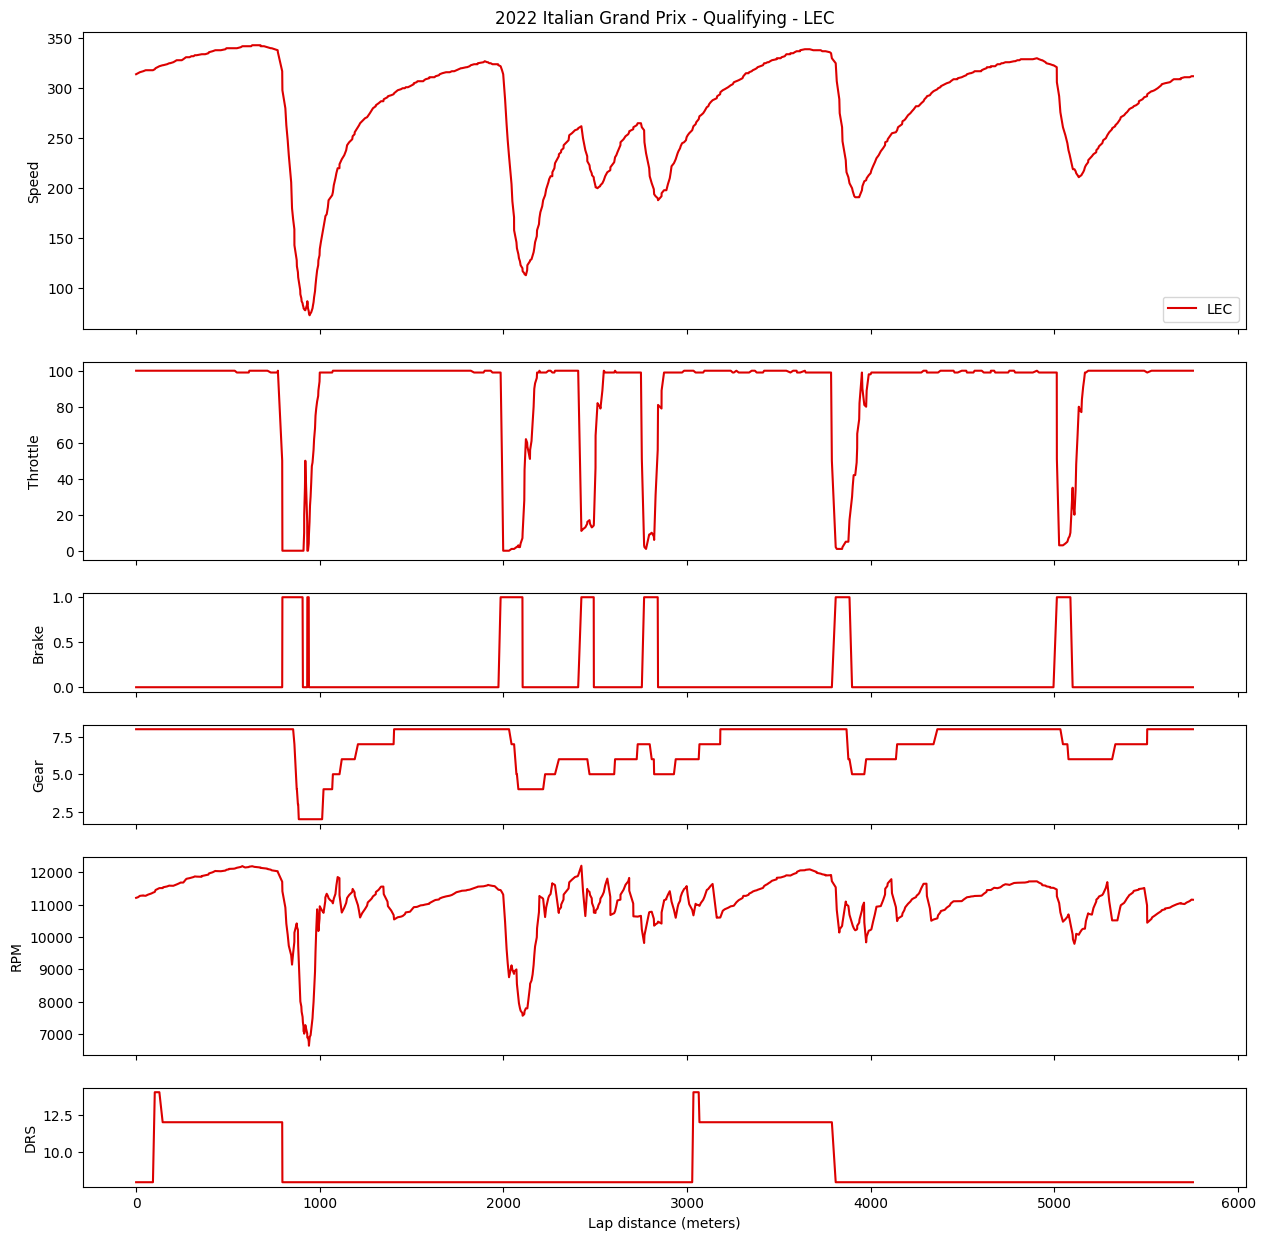

In [15]:
# Impostazione delle dimensioni del grafico
plt.rcParams['figure.figsize'] = plot_size

# Crea sottotrame con dimensioni diverse
fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})

# Imposta il titolo del grafico
ax[0].title.set_text(plot_title)

# Linea della velocità
ax[0].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

# Linea dell'accelleratore
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].set(ylabel='Throttle')

# Linea del freno
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].set(ylabel='Brake')

# Linea della marcia
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].set(ylabel='Gear')

# Linea del giro motore
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].set(ylabel='RPM')

# Linea del DRS
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].set(ylabel='DRS')
ax[5].set(xlabel='Lap distance (meters)')


# Nascondi le etichette x e le etichette dei segni di spunta per i grafici superiori e i segni di spunta y per i grafici di destra.
for a in ax.flat:
    a.label_outer()
    
# Stampa il grafico
plt.show()

In [18]:
# Rimuove le colonne non necessarie
telemetry_driver_1.drop(labels=["Date","SessionTime","DriverAhead","DistanceToDriverAhead","Source","RelativeDistance","Status","X","Y","Z"], axis=1, inplace=True)

In [19]:
# Visualizza i dati
telemetry_driver_1

,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Distance
2,0 days 00:00:00,11211,314,8,100,False,8,0.000000
3,0 days 00:00:00.119000,11231,315,8,100,False,8,10.412500
4,0 days 00:00:00.232000,11272,316,8,100,False,8,20.331389
5,0 days 00:00:00.432000,11285,317,8,100,False,8,37.942500
6,0 days 00:00:00.439000,11280,317,8,100,False,8,38.558889
...,...,...,...,...,...,...,...,...
620,0 days 00:01:19.632000,11019,311,8,100,False,8,5708.303333
621,0 days 00:01:19.759000,11065,311,8,100,False,8,5719.274722
622,0 days 00:01:19.959000,11111,311,8,100,False,8,5736.552500
623,0 days 00:01:20.072000,11157,312,8,100,False,8,5746.345833


In [20]:
# Salva i dati in un file .csv
telemetry_driver_1.to_csv('telemetry.csv')